Web Scraping Craigslist Motorcycles

In [28]:
from requests import get, post
from bs4 import BeautifulSoup
from selenium import webdriver
import time
import numpy as np
import re

In [29]:
#base 
url = 'https://seattle.craigslist.org/search/mca#search=1~gallery~0~0'

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
driver = webdriver.Chrome(options=chrome_options)

driver.get(url)

time.sleep(5)

html = driver.page_source

driver.get_screenshot_as_file("screenshot.png")
driver.quit()

html_soup = BeautifulSoup(html, 'html5lib')

In [30]:

num_results = html_soup.find('div', class_="cl-search-paginator").find('span', class_='cl-page-number').text

match = re.search(r'of\s(.+)', num_results)
num_results = int(match.group(1).replace(',',''))
print(num_results)

pages = np.arange(0,num_results+1,120)


2272


In [31]:
titles = []
years = []
links = []
prices = []
locations = []
list_dates = []
miles = []
sources = []

In [32]:
for page in range(0,len(pages)):
    url = 'https://seattle.craigslist.org/search/mca#search=1~gallery~'+ str(page)+'~0' 
    chrome_options = webdriver.ChromeOptions()
    chrome_options.add_argument('--headless')
    driver = webdriver.Chrome(options=chrome_options)

    driver.get(url)

    time.sleep(5)

    html = driver.page_source

    driver.quit()

    html_soup = BeautifulSoup(html, 'html5lib')

    results = html_soup.find('div', class_="cl-search-results").find('div', class_='results').find_all('li', class_='cl-search-result')

    #perform scraping
    for post in results:
        title = post.find('a', class_='cl-app-anchor').find('span').text

        if not title:
            print('skipping')
            continue

        titles.append(title)

        year = "-1"
        match = re.search(r'\b\d{4}\b', title)
        if match:
            year = match.group()

        years.append(year)

        price = "-1"
        price = post.find('span', class_='priceinfo')
        if price and not '':
            price = price.text

        prices.append(price)

        link = post.find('a', class_='cl-app-anchor').get('href')
        links.append(link)

        location = "-1"
        match = re.search(r"/d/(.*?)(?=-)", link)
        if match:
            location = match.group(1)
        
        locations.append(location)

        #meta info (timestamp,  mileage, location) all '.' seperated
        meta_data = post.find('div', class_='meta').text.split('·')
        list_dates.append(meta_data[0]) #if includes 'ago', replace with current date
        
        if re.search(r"(\d+|k)\s*mi", meta_data[1]):
            miles.append(meta_data[1])
        else:
            miles.append("-1")

        sources.append("craigslist")

    print('Page ' + str(page+1) + ' complete!')

Page 1 complete!
Page 2 complete!
Page 3 complete!
Page 4 complete!
Page 5 complete!
Page 6 complete!
Page 7 complete!
Page 8 complete!
Page 9 complete!
Page 10 complete!
Page 11 complete!
Page 12 complete!
Page 13 complete!
Page 14 complete!
Page 15 complete!
Page 16 complete!
Page 17 complete!
Page 18 complete!
Page 19 complete!


In [33]:
print(len(titles))
print(len(prices))
print(len(locations))
print(len(years))
print(len(miles))
print(len(list_dates))
print(len(links))
print(len(sources))

2272
2272
2272
2272
2272
2272
2272
2272


In [34]:
titles

['2013 Kymco Agility 125 Moped',
 '2023 Husqvarna Vitpilen 401 Vitpilen',
 '2022 KTM 890 Adventure R',
 '1984 R65LS Air head',
 '2023 Powerful DUAL MOTOR 6000W E-Scooters',
 '2005 Yamaha Royal Star tour deluxe',
 '2016 KTM 350 SXF',
 '2023 KTM 390 Duke Naked',
 '2023 KTM 390 Duke Naked',
 '2023 GASGAS EX 450F Cross Country',
 '2019 HONDA AFRICA TWIN DCT',
 '2023 GASGAS EX 250 Cross Country',
 '2018 Ducati Panigale V4 S 25,000 OBO',
 '2019 YAMAHA TT-R50E',
 'Victory Vegas',
 '2023 GASGAS MC 85 17/14 Motocross',
 '2023 GASGAS ES 700 Travel',
 '2023 GASGAS MC 65 Motocross',
 '2023 GASGAS MC 50 Motocross',
 '2023 GASGAS MC-E 3 Motocross',
 '2023 GASGAS MC-E 5 Motocross',
 '03 Road King Classic 100 yr Anniversary edition',
 '2014 Harley Davidson Ultra Limited',
 '2015 Sherco 125 2T trials',
 '49cc Scooter with LED lights',
 '2019 KAWASAKI KX450',
 '2014 KTM 350 XCF-W with Thumper Racing 400cc big bore kit',
 '2023 Husqvarna TC 85 17 14',
 '2 Honda Ruckus',
 '2019 kawisaki z400',
 'DRZ 400 s

Data Cleaning

In [35]:
import pandas as pd
df = pd.DataFrame({'title': titles,
                   'price': prices,
                   'location': locations,
                   'year': years,
                   'mileage': miles,
                   'list_date': list_dates,
                   'URL': links,
                   'source': sources
                   })

print(df.info())
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2272 entries, 0 to 2271
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      2272 non-null   object
 1   price      2219 non-null   object
 2   location   2272 non-null   object
 3   year       2272 non-null   object
 4   mileage    2272 non-null   object
 5   list_date  2272 non-null   object
 6   URL        2272 non-null   object
 7   source     2272 non-null   object
dtypes: object(8)
memory usage: 142.1+ KB
None
                                               title    price    location  \
0                       2013 Kymco Agility 125 Moped   $1,000    kirkland   
1               2023 Husqvarna Vitpilen 401 Vitpilen   $5,149  bellingham   
2                           2022 KTM 890 Adventure R  $13,500     seattle   
3                                1984 R65LS Air head   $1,200      vashon   
4          2023 Powerful DUAL MOTOR 6000W E-Scooters   $3,750     seattl

In [36]:
df.to_csv('craigslist_seattle_bikes.csv', index=False)

Data Exploration

In [47]:
df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].astype(float)

# Dynas!!!
dyna_df = df[df['title'].str.contains('dyna', case=False)]

# Print the filtered DataFrame
print(dyna_df)
print(len(dyna_df))

                                                  title    price    location  \
31                            2006 Harley Davidson Dyna     70.0        port   
38           2016 Harley-Davidson FXDL - Dyna Low Rider  12499.0    lakewood   
63                          2003 Harley Dyna SuperGlide   9000.0     olympia   
204   2003 Harley Davidson Dyna Low Rider FXDL Anniv...   6300.0   snohomish   
310                2016 Harley-Davidson Dyna Street Bob  13999.0  silverdale   
335                      1996 Harley Davidson Dynaglide   5800.0    kirkland   
430                2016 Harley-Davidson Dyna Street Bob  13999.0  silverdale   
455                      1996 Harley Davidson Dynaglide   5800.0    kirkland   
481                2016 Harley-Davidson Dyna Street Bob  13999.0      tacoma   
677                1995 Harley-Davidson Dyna Wide Glide   5999.0     everett   
742                         2017 Harley Dyna Lowrider S  16000.0    puyallup   
805          2017 Harley Davidson FXDWG 

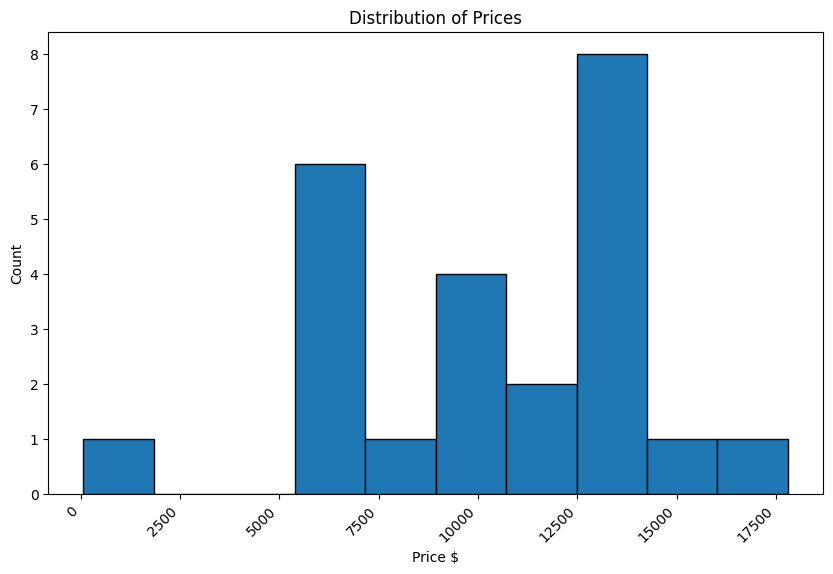

In [49]:
#start to look at the distributions
from matplotlib import figure
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 6))
plt.xticks(rotation=45, ha='right')

plt.hist(dyna_df['price'], edgecolor='black',bins=10);
plt.xlabel("Price $")
plt.ylabel('Count')
plt.title("Distribution of Prices");